后文中的tableX/figX与PPT2中的图标编号一致，与输出表格编号一致

### 数据

模型交易信号、成分股行业

In [1]:
import pandas as pd
import numpy as np

In [2]:
gbdt = pd.read_parquet('result\\gbdt\\gbdt_all_periods.parquet')
lightgbm = pd.read_parquet('result\\lightgbm\\lightgbm_all_periods.parquet')
nn = pd.read_parquet('result\\nn\\nn_all_periods.parquet')
rf = pd.read_parquet('result\\rf\\rf_all_periods.parquet')
xgboost = pd.read_parquet('result\\xgboost\\xgboost_all_periods.parquet')


nn_rf_gbdt_ensemble = pd.read_parquet('result\\nn_rf_gbdt_ensemble.parquet')
nn_rf_lightgbm_ensemble = pd.read_parquet('result\\nn_rf_lightgbm_ensemble.parquet')
nn_rf_xgboost_ensemble = pd.read_parquet('result\\nn_rf_xgboost_ensemble.parquet')

In [169]:
hangye = pd.read_csv('sp500.csv')
hangye

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [171]:
hangye.rename(columns={'Symbol': 'Ticker'}, inplace=True)
merged_df = pd.merge(nn_rf_gbdt_ensemble, hangye[['Ticker', 'GICS Sector']], on='Ticker', how='left')
merged_df

,Date,Ticker,Return_tomorrow,Target,nn_proba,rf_proba,gbdt_proba,nn_gini,rf_gini,gbdt_gini,mean_proba,mean_pred,gini_proba,gini_pred,gini_rank_proba,gini_rank_pred,GICS Sector
0,1999-06-25,AAPL,0.008848,1,0.521082,0.528359,0.526952,0.040434,0.025083,0.030096,0.525464,1,0.524839,1,0.524006,1,Information Technology
1,1999-06-25,ABMD,-0.027577,0,0.479983,0.483227,0.488183,0.040434,0.025083,0.030096,0.483798,0,0.483415,0,0.482809,0,NaN
2,1999-06-25,ABT,0.007118,0,0.496939,0.505681,0.499118,0.040434,0.025083,0.030096,0.500579,1,0.499918,0,0.499123,0,Health Care
3,1999-06-25,ACGL,-0.037271,0,0.478310,0.490207,0.480981,0.040434,0.025083,0.030096,0.483166,0,0.482272,0,0.481201,0,Financials
4,1999-06-25,ADBE,0.026629,1,0.473703,0.446274,0.460329,0.040434,0.025083,0.030096,0.460102,0,0.462298,0,0.465068,0,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874829,2024-04-26,YUM,0.009966,1,0.504430,0.514431,0.514262,0.015721,0.009498,0.008313,0.511041,1,0.509700,1,0.508945,1,Consumer Discretionary
3874830,2024-04-26,ZBH,0.019581,1,0.505496,0.511004,0.499331,0.015721,0.009498,0.008313,0.505277,1,0.505528,1,0.505877,1,Health Care
3874831,2024-04-26,ZBRA,0.009377,1,0.501835,0.470514,0.495429,0.015721,0.009498,0.008313,0.489260,0,0.491376,0,0.492129,0,Information Technology
3874832,2024-04-26,ZION,-0.010592,0,0.503348,0.474502,0.482803,0.015721,0.009498,0.008313,0.486884,0,0.490084,0,0.491745,0,NaN


### 回测五：交易标的行业拆解

Table 6 Equal-weighted ensemble strategy with k = 10 from July 1999 until December 2023: breakdown of S&P 500 constituents by industry versus breakdown of ENS1 long and short portfolio holdings by industry, in percent.

In [175]:
# 假设 merged_df 是已经合并好的数据框
# 1. 按 Date 分组
grouped = merged_df.groupby('Date')

# 2. 对每个分组按 mean_proba 排序，并保留每天的前10名和后10名
top_10 = grouped.apply(lambda x: x.nlargest(10, 'mean_proba')).reset_index(drop=True)
bottom_10 = grouped.apply(lambda x: x.nsmallest(10, 'mean_proba')).reset_index(drop=True)

# 3. 统计所有前10名、后10名和整体的 GICS Sector 列不同取值的占比
def calculate_sector_ratio(df, column='GICS Sector'):
    sector_count = df[column].value_counts()
    sector_ratio = sector_count / len(df)
    return sector_ratio *100

top_10_ratio = calculate_sector_ratio(top_10)
bottom_10_ratio = calculate_sector_ratio(bottom_10)
overall_ratio = calculate_sector_ratio(merged_df)

# 将结果汇总到一个 DataFrame 中
sector_ratios = pd.DataFrame({
    'Share in S&P 500': overall_ratio,
    'Share long': top_10_ratio,
    'Share short': bottom_10_ratio
}).fillna(0)

sector_ratios

,Share in S&P 500,Share long,Share short
GICS Sector,,,
Communication Services,2.542044,2.0112,1.2064
Consumer Discretionary,7.071271,6.4080,3.5968
Consumer Staples,5.297001,2.4592,0.9072
Energy,3.251752,2.2416,1.2016
Financials,10.039140,4.3232,1.9936
Health Care,9.006837,7.1984,4.5024
Industrials,10.458513,5.6608,3.1168
Information Technology,8.884252,9.2528,6.7872
Materials,3.819518,2.1152,0.9184


In [176]:
sector_ratios.to_csv("table6.csv")

### 统计套利交易策略

基于模型型号的预测概率构建多空组合，并计算多空收益

In [3]:
# 计算多空组合收益
def calculate_long_short_return(group, k):
    long_positions = group.tail(k)
    short_positions = group.head(k)
    
    # 计算多空组合收益
    long_return = long_positions['Return_tomorrow'].sum() / k
    short_return = short_positions['Return_tomorrow'].sum() / k 
    long_short_return = long_return - short_return

    # 计算多空组合收益（交易成本0.1%）
    long_return_tran = long_positions['Return_tomorrow'].sum() / k -0.001
    short_return_tran = short_positions['Return_tomorrow'].sum() / k + 0.001
    long_short_return_tran = long_return_tran - short_return_tran

    return pd.Series({'long_return': long_return, 'short_return': short_return, 'long_short_return': long_short_return,
                     'long_return_tran': long_return_tran, 'short_return_tran': short_return_tran, 'long_short_return_tran': long_short_return_tran})

集成模型由于存在预测概率的不同加权方式，定义的函数与基础模型不同

In [4]:
def process_data(df, model_name, k):
    print(f"Processing {model_name} data...")
    
    # 缩尾处理
    lower_bound = np.percentile(df["Return_tomorrow"], 0.5)
    upper_bound = np.percentile(df["Return_tomorrow"], 99.5)
    df = df[(df["Return_tomorrow"] >= lower_bound) & (df["Return_tomorrow"] <= upper_bound)]
    df = df.sort_values(by=['Date', 'pred_proba'])
    
    result = df.groupby('Date').apply(calculate_long_short_return, k=k).reset_index()
    accuracy =  df.groupby('Date').apply(calculate_long_short_accuracy, k=k).mean()
    return result, accuracy

In [7]:
def process_data_ENS(df, model_name, ENSway, k):
    print(f"Processing {model_name} data...")
    
    # 缩尾处理
    lower_bound = np.percentile(df["Return_tomorrow"], 0.5)
    upper_bound = np.percentile(df["Return_tomorrow"], 99.5)
    df = df[(df["Return_tomorrow"] >= lower_bound) & (df["Return_tomorrow"] <= upper_bound)]
    df = df.sort_values(by=['Date', ENSway])
    
    result = df.groupby('Date').apply(calculate_long_short_return, k=k).reset_index()
    accuracy =  df.groupby('Date').apply(calculate_long_short_accuracy_ENS, k=k, ENSway=ENSway).mean()
    return result, accuracy

In [5]:
def calculate_long_short_accuracy(group, k):
    long_positions = group.tail(k)
    short_positions = group.head(k)
    accuracy = ((long_positions["Target"] == long_positions["pred"]).sum() + (short_positions["Target"] == short_positions["pred"]).sum()) / (2*k)
    return accuracy

In [6]:
def calculate_long_short_accuracy_ENS(group, k, ENSway):
    long_positions = group.tail(k)
    short_positions = group.head(k)
    accuracy = ((long_positions["Target"] == long_positions[ENSway[:-6]+"_pred"]).sum() + (short_positions["Target"] == short_positions[ENSway[:-6]+"_pred"]).sum()) / (2*k)
    return accuracy

In [60]:
gbdt_LSresult, gbdt_LSaccuracy = process_data(gbdt, "GBDT", 10)
lightgbm_LSresult, lightgbm_LSaccuracy = process_data(lightgbm, "LightGBM", 10)
rf_LSresult, rf_LSaccuracy = process_data(rf, "RF", 10)
xgboost_LSresult, xgboost_LSaccuracy = process_data(xgboost, "XGBoost", 10)
nn_LSresult, nn_LSaccuracy = process_data(nn, "NN", 10)

Processing GBDT data...
Processing LightGBM data...
Processing RF data...
Processing XGBoost data...
Processing NN data...


In [107]:
accuracies

{'GBDT': [0.53984,
  0.5280096,
  0.5206647999999999,
  0.5163242666666666,
  0.5129012],
 'RF': [0.537104, 0.5251680000000001, 0.5193, 0.5152938666666667, 0.5123928],
 'NN': [0.53364, 0.5239408, 0.5174736, 0.5135626666666667, 0.5110596],
 'NN+RF+GBDT Mean': [0.54168,
  0.5285136,
  0.5217696000000001,
  0.5172853333333334,
  0.5141584],
 'NN+RF+GBDT Gini': [0.5418080000000001,
  0.5289408,
  0.5219024000000001,
  0.5174677333333333,
  0.51438],
 'NN+RF+GBDT Rank': [0.5420879999999999,
  0.5285936,
  0.5218336,
  0.5172624,
  0.514258]}

### 回测一：模型综合性能对比

Fig. 1. Daily performance metrics for long-short portfolios of different sizes: mean return, standard deviation, and directional accuracy from July 1999 until December 2023.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 生成不同投资组合规模模型性能指标

data_sizes = [10, 50, 100, 150, 200]

accuracies = {
    "GBDT": [],
    "RF": [],
    "NN": [],
    "NN+RF+GBDT Mean": [],
    "NN+RF+GBDT Gini": [],
    "NN+RF+GBDT Rank": []
}

mean_returns = {
    "GBDT": [],
    "RF": [],
    "NN": [],
    "NN+RF+GBDT Mean": [],
    "NN+RF+GBDT Gini": [],
    "NN+RF+GBDT Rank": []
}

std_returns = {
    "GBDT": [],
    "RF": [],
    "NN": [],
    "NN+RF+GBDT Mean": [],
    "NN+RF+GBDT Gini": [],
    "NN+RF+GBDT Rank": []
}

for size in data_sizes:
    gbdt_LSresult, gbdt_LSaccuracy = process_data(gbdt, "GBDT", size)
    rf_LSresult, rf_LSaccuracy = process_data(rf, "RF", size)
    nn_LSresult, nn_LSaccuracy = process_data(nn, "NN", size)
    nn_rf_gbdt_ENSmean_LSresult, nn_rf_gbdt_ENSmean_LSaccuracy = process_data_ENS(nn_rf_gbdt_ensemble, "nn_rf_gbdt_ENSmean_LSresult", "mean_proba", size)
    nn_rf_gbdt_ENSgini_LSresult, nn_rf_gbdt_ENSgini_LSaccuracy = process_data_ENS(nn_rf_gbdt_ensemble, "nn_rf_gbdt_ENSgini_LSresult", "gini_proba", size)
    nn_rf_gbdt_ENSrank_LSresult, nn_rf_gbdt_ENSrank_LSaccuracy = process_data_ENS(nn_rf_gbdt_ensemble, "nn_rf_gbdt_ENSrank_LSresult", "gini_rank_proba", size)
    
    accuracies["GBDT"].append(gbdt_LSaccuracy)
    accuracies["RF"].append(rf_LSaccuracy)
    accuracies["NN"].append(nn_LSaccuracy)
    accuracies["NN+RF+GBDT Mean"].append(nn_rf_gbdt_ENSmean_LSaccuracy)
    accuracies["NN+RF+GBDT Gini"].append(nn_rf_gbdt_ENSgini_LSaccuracy)
    accuracies["NN+RF+GBDT Rank"].append(nn_rf_gbdt_ENSrank_LSaccuracy)
    
    mean_returns["GBDT"].append(gbdt_LSresult["long_short_return"].mean())
    mean_returns["RF"].append(rf_LSresult["long_short_return"].mean())
    mean_returns["NN"].append(nn_LSresult["long_short_return"].mean())
    mean_returns["NN+RF+GBDT Mean"].append(nn_rf_gbdt_ENSmean_LSresult["long_short_return"].mean())
    mean_returns["NN+RF+GBDT Gini"].append(nn_rf_gbdt_ENSgini_LSresult["long_short_return"].mean())
    mean_returns["NN+RF+GBDT Rank"].append(nn_rf_gbdt_ENSrank_LSresult["long_short_return"].mean())

    std_returns["GBDT"].append(gbdt_LSresult["long_short_return"].std())
    std_returns["RF"].append(rf_LSresult["long_short_return"].std())
    std_returns["NN"].append(nn_LSresult["long_short_return"].std())
    std_returns["NN+RF+GBDT Mean"].append(nn_rf_gbdt_ENSmean_LSresult["long_short_return"].std())
    std_returns["NN+RF+GBDT Gini"].append(nn_rf_gbdt_ENSgini_LSresult["long_short_return"].std())
    std_returns["NN+RF+GBDT Rank"].append(nn_rf_gbdt_ENSrank_LSresult["long_short_return"].std())

Processing GBDT data...
Processing RF data...
Processing NN data...
Processing nn_rf_gbdt_ENSmean_LSresult data...
Processing nn_rf_gbdt_ENSgini_LSresult data...
Processing nn_rf_gbdt_ENSrank_LSresult data...
Processing GBDT data...
Processing RF data...
Processing NN data...
Processing nn_rf_gbdt_ENSmean_LSresult data...
Processing nn_rf_gbdt_ENSgini_LSresult data...
Processing nn_rf_gbdt_ENSrank_LSresult data...
Processing GBDT data...
Processing RF data...
Processing NN data...
Processing nn_rf_gbdt_ENSmean_LSresult data...
Processing nn_rf_gbdt_ENSgini_LSresult data...
Processing nn_rf_gbdt_ENSrank_LSresult data...
Processing GBDT data...
Processing RF data...
Processing NN data...
Processing nn_rf_gbdt_ENSmean_LSresult data...
Processing nn_rf_gbdt_ENSgini_LSresult data...
Processing nn_rf_gbdt_ENSrank_LSresult data...
Processing GBDT data...
Processing RF data...
Processing NN data...
Processing nn_rf_gbdt_ENSmean_LSresult data...
Processing nn_rf_gbdt_ENSgini_LSresult data...
Pr

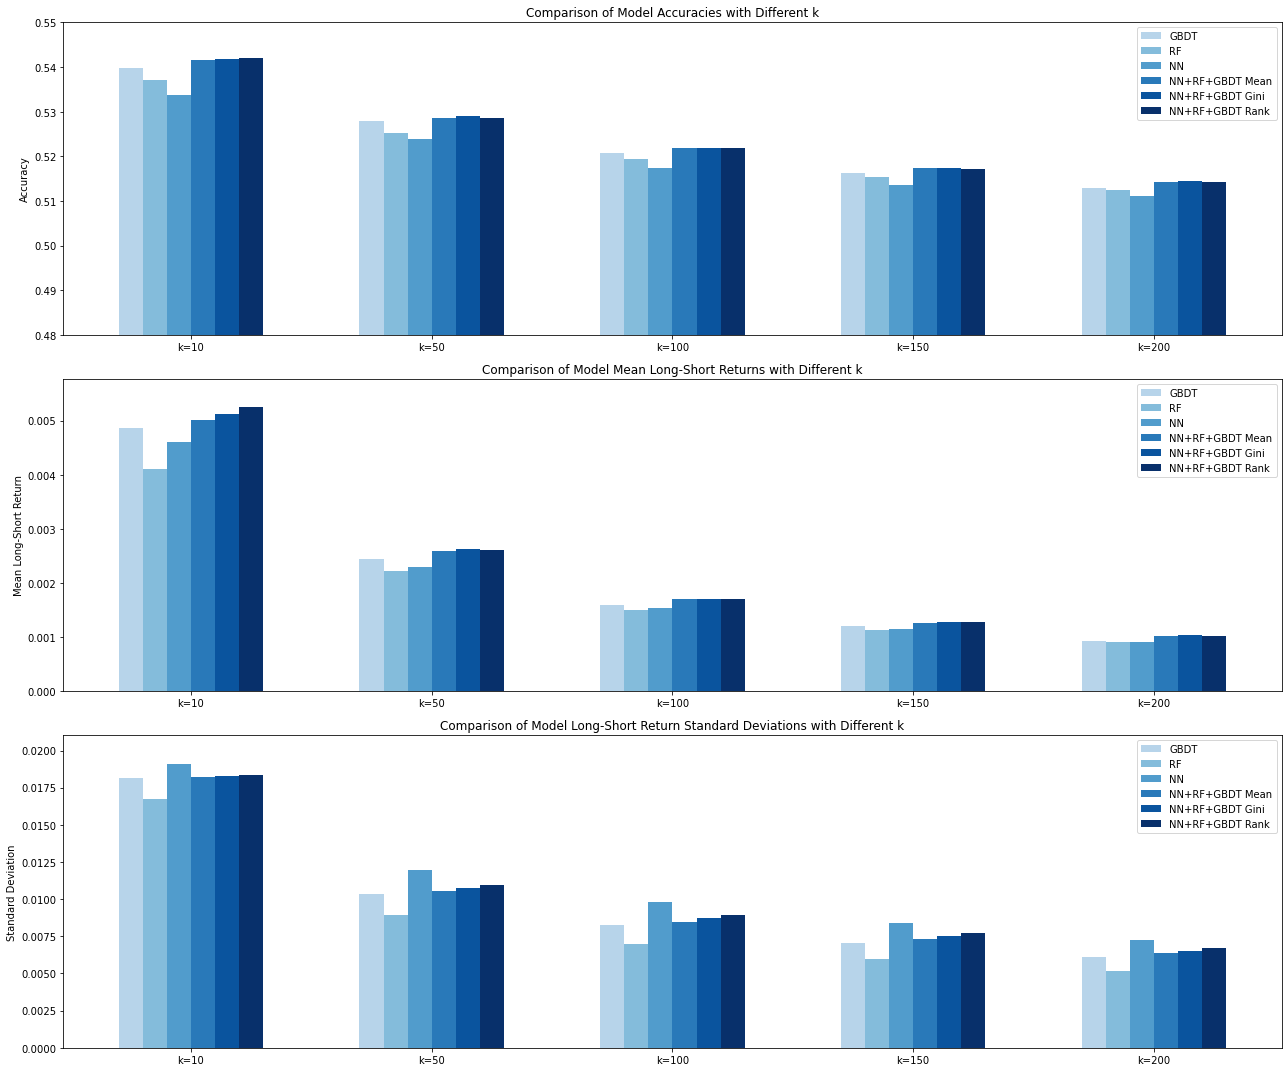

In [16]:
# 创建并排柱状图
labels = ['k=10', 'k=50', 'k=100', 'k=150', 'k=200']
x = range(len(labels))

fig, axes = plt.subplots(3, 1, figsize=(18, 15))
bar_width = 0.1

# 颜色渐变
colors = plt.cm.Blues(np.linspace(0.3, 1, len(mean_returns)))

# 绘制准确度的柱状图
for i, (model, model_accuracies) in enumerate(accuracies.items()):
    axes[0].bar([p + bar_width * i for p in x], model_accuracies, bar_width, label=model, color=colors[i])

axes[0].set_title('Comparison of Model Accuracies with Different k')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.48, 0.55)
axes[0].set_xticks([p + 2.5 * bar_width for p in x])
axes[0].set_xticklabels(labels)
axes[0].legend()

# 绘制均值的柱状图
for i, (model, model_means) in enumerate(mean_returns.items()):
    axes[1].bar([p + bar_width * i for p in x], model_means, bar_width, label=model, color=colors[i])

axes[1].set_title('Comparison of Model Mean Long-Short Returns with Different k')
axes[1].set_ylabel('Mean Long-Short Return')
axes[1].set_ylim(0, max(max(mean_returns[model]) for model in mean_returns) * 1.1)
axes[1].set_xticks([p + 2.5 * bar_width for p in x])
axes[1].set_xticklabels(labels)
axes[1].legend()

# 绘制标准差的柱状图
for i, (model, model_stds) in enumerate(std_returns.items()):
    axes[2].bar([p + bar_width * i for p in x], model_stds, bar_width, label=model, color=colors[i])

axes[2].set_title('Comparison of Model Long-Short Return Standard Deviations with Different k')
axes[2].set_ylabel('Standard Deviation')
axes[2].set_ylim(0, max(max(std_returns[model]) for model in std_returns) * 1.1)
axes[2].set_xticks([p + 2.5 * bar_width for p in x])
axes[2].set_xticklabels(labels)
axes[2].legend()

# 显示图表
plt.tight_layout()
plt.savefig('fig1.png', dpi=300)
plt.show()

之后分析集中在k=10

In [31]:
gbdt_result = gbdt.sort_values(by=['Date', 'pred_proba']).groupby('Date').apply(calculate_long_short_return, k=10).reset_index()
rf_result = rf.sort_values(by=['Date', 'pred_proba']).groupby('Date').apply(calculate_long_short_return, k=10).reset_index()
nn_result = nn.sort_values(by=['Date', 'pred_proba']).groupby('Date').apply(calculate_long_short_return, k=10).reset_index()

### 回测二：收益-风险特征分析

### 每日回报特征 

下面是自定义的characteristic metric计算（基础模型、集成模型、benchmark市场），后续封装成函数，保留了调试过程与中间结果输出，有较多重复。

In [66]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import empyrical


nn_result = nn.groupby('Date').apply(calculate_long_short_return, k=10).reset_index()

# 计算指标
mean_return = nn_LSresult['long_short_return'].mean()
mean_return_long = nn_LSresult['long_return'].mean()
mean_return_short = nn_LSresult['short_return'].mean()
std_return = nn_LSresult['long_short_return'].std()

min_return = nn_result['long_short_return'].min()
q1_return = nn_result['long_short_return'].quantile(0.25)
median_return = nn_result['long_short_return'].median()
q3_return = nn_result['long_short_return'].quantile(0.75)
max_return = nn_result['long_short_return'].max()
skewness = nn_result['long_short_return'].skew()
kurtosis = nn_result['long_short_return'].kurtosis()

## t -statistic (NW)
# 计算 Newey-West 标准误差
Y = nn_LSresult['long_short_return']
X = [1] * len(Y)
model = sm.OLS(Y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
std_error_nw = model.bse[0]  # 使用拟合模型中的标准误差
# t 统计量计算
t_statistic_nw = model.tvalues.values[0]


# VaR 和 CVaR 计算
def historical_var(returns, level=5):
    return np.percentile(returns, level)

def historical_cvar(returns, level=5):
    var = historical_var(returns, level)
    return returns[returns <= var].mean()

var_1_percent = historical_var(nn_LSresult['long_short_return'], 1)
var_5_percent = historical_var(nn_LSresult['long_short_return'], 5)
cvar_1_percent = historical_cvar(nn_LSresult['long_short_return'], 1)
cvar_5_percent = historical_cvar(nn_LSresult['long_short_return'], 5)

# 最大回撤计算
max_drawdown_value = empyrical.max_drawdown(nn_LSresult["long_short_return"])

# Calmar 比率计算
calmar_ratio = empyrical.annual_return(nn_LSresult['long_short_return'])

# PT 测试统计量（示例）
def pt_test(Y, X):
    import numpy as np
    from scipy.stats import norm
    import collections
    
    Z = np.array([i for i in map(lambda x: 1 if np.sign(x[0]) ==np.sign(x[1]) else 0, zip(Y,X))])
    
    n = len(Y)
    Py = sum(Y)/n
    Px = sum(X)/n
    PHat = sum(Z)/len(Z)
    PStar = Py*Px + (1-Py)*(1-Px)
    
    VarPHat = (PStar*(1-PStar))/n
    VarPStar = ((2*Py-1)**2 * Px * (1-Px))/n + ((2*Px-1)**2 * Py * (1-Py))/n + (4 * Px * Py * (1-Py) * (1-Px))/n**2
    
    s = (PHat - PStar) / np.sqrt(VarPHat - VarPStar)
    
    pValue = norm.sf(s)
    
    pt_return = collections.namedtuple('PT_test','PT_statistics p_value Directional_Accuracy')
    
    rt = pt_return(PT_statistics = s, p_value = pValue, Directional_Accuracy = PHat)
    
    return rt
pt_test_statistic = pt_test(nn["Target"], nn["pred"])[0]  # PT 测试统计量的计算方法需要具体定义

# Share with return > 0
positive_ratio = sum(1 for return_value in nn_LSresult['long_short_return'] if return_value > 0) / len(nn_LSresult['long_short_return'])

# 将结果汇总到一个字典中
metrics = {
    'Mean Return(long)':mean_return_long,
    'Mean Return(short)':mean_return_short,
    'Mean Return': mean_return,
    'Standard Error (NW)': std_error_nw,
    't-statistic (NW)': t_statistic_nw,
    'PT Test Statistic': pt_test_statistic,
    'Minimum': min_return,
    'Quartile 1': q1_return,
    'Median': median_return,
    'Quartile 3': q3_return,
    'Maximum': max_return,
    'Standard Deviation': std_return,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Historical 1-percent VaR': var_1_percent,
    'Historical 1-percent CVaR': cvar_1_percent,
    'Historical 5-percent VaR': var_5_percent,
    'Historical 5-percent CVaR': cvar_5_percent,
    'Maximum Drawdown': max_drawdown_value,
    'Calmar Ratio': calmar_ratio,
    'Share with return > 0': positive_ratio
}

# 将结果转换为 DataFrame 并转置以便于查看
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Before transaction costs'])

# 重新计算指标
mean_return = nn_LSresult['long_short_return_tran'].mean()
mean_return_long = nn_LSresult['long_return_tran'].mean()
mean_return_short = nn_LSresult['short_return_tran'].mean()

std_return = nn_LSresult['long_short_return_tran'].std()

min_return = nn_result['long_short_return_tran'].min()
q1_return = nn_result['long_short_return_tran'].quantile(0.25)
median_return = nn_result['long_short_return_tran'].median()
q3_return = nn_result['long_short_return_tran'].quantile(0.75)
max_return = nn_result['long_short_return_tran'].max()

skewness = nn_result['long_short_return_tran'].skew()
kurtosis = nn_result['long_short_return_tran'].kurtosis()

# 计算 Newey-West 标准误差
Y = nn_LSresult['long_short_return_tran']
X = [1] * len(Y)
model = sm.OLS(Y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
std_error_nw = model.bse[0]  # 使用拟合模型中的标准误差
t_statistic_nw = model.tvalues.values[0]  # VaR 和 CVaR 计算
var_1_percent = historical_var(nn_LSresult['long_short_return_tran'], 1)
var_5_percent = historical_var(nn_LSresult['long_short_return_tran'], 5)
cvar_1_percent = historical_cvar(nn_LSresult['long_short_return_tran'], 1)
cvar_5_percent = historical_cvar(nn_LSresult['long_short_return_tran'], 5)

# 最大回撤计算
max_drawdown_value = empyrical.max_drawdown(nn_LSresult["long_short_return_tran"])

# Calmar 比率计算
calmar_ratio = empyrical.calmar_ratio(nn_LSresult['long_short_return_tran'], period='daily', annualization=None)

# PT 测试统计量计算
pt_test_statistic = np.nan

# Share with return > 0
positive_ratio = sum(1 for return_value in nn_LSresult['long_short_return_tran'] if return_value > 0) / len(nn_LSresult['long_short_return_tran'])


# 将结果汇总到一个字典中
metrics = {
    'Mean Return(long)': mean_return_long,
    'Mean Return(short)': mean_return_short,
    'Mean Return': mean_return,
    'Standard Error (NW)': std_error_nw,
    't-statistic (NW)': t_statistic_nw,
    'PT Test Statistic': pt_test_statistic,
    'Minimum': min_return,
    'Quartile 1': q1_return,
    'Median': median_return,
    'Quartile 3': q3_return,
    'Maximum': max_return,
    'Standard Deviation': std_return,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Historical 1-percent VaR': var_1_percent,
    'Historical 1-percent CVaR': cvar_1_percent,
    'Historical 5-percent VaR': var_5_percent,
    'Historical 5-percent CVaR': cvar_5_percent,
    'Maximum Drawdown': max_drawdown_value,
    'Calmar Ratio': calmar_ratio,
    'Share with return > 0': positive_ratio
}

# 将结果转换为 DataFrame 并转置以便于查看
metrics_df_tran = pd.DataFrame.from_dict(metrics, orient='index', columns=['After transaction costs'])

# 将结果与之前的结果合并
combined_metrics_df = pd.concat([metrics_df, metrics_df_tran], axis=1)
combined_metrics_df

,Before transaction costs,After transaction costs
Mean Return(long),0.002128,0.001128
Mean Return(short),-0.002481,-0.001481
Mean Return,0.004609,0.002609
Standard Error (NW),0.000235,0.000235
t-statistic (NW),19.636888,11.115803
PT Test Statistic,36.970778,NaN
Minimum,-0.555774,-0.557774
Quartile 1,-0.006545,-0.008545
Median,-0.000143,-0.002143
Quartile 3,0.006276,0.004276


Table 2 Daily return characteristics of k = 10 portfolio, prior to and after transaction costs for DNN, GBT, RAF,  ENS1 compared to general market (MKT) from July 1999 until December 2023. NW denotes Newey–West standard errors with with one-lag correction and PT the Pesaran– Timmermann test.

In [67]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import empyrical

def calculate_metrics(df, df_LSresult):
    # 在函数内部计算df_result
    df_result = df.groupby('Date').apply(calculate_long_short_return, k=10).reset_index()
    
    # 计算指标
    mean_return = df_LSresult['long_short_return'].mean()
    mean_return_long = df_LSresult['long_return'].mean()
    mean_return_short = df_LSresult['short_return'].mean()
    std_return = df_LSresult['long_short_return'].std()

    min_return = df_result['long_short_return'].min()
    q1_return = df_result['long_short_return'].quantile(0.25)
    median_return = df_result['long_short_return'].median()
    q3_return = df_result['long_short_return'].quantile(0.75)
    max_return = df_result['long_short_return'].max()
    skewness = df_result['long_short_return'].skew()
    kurtosis = df_result['long_short_return'].kurtosis()

    ## t -statistic (NW)
    # 计算 Newey-West 标准误差
    Y = df_LSresult['long_short_return']
    X = [1] * len(Y)
    model = sm.OLS(Y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
    std_error_nw = model.bse[0]  # 使用拟合模型中的标准误差
    # t 统计量计算
    t_statistic_nw = model.tvalues.values[0]

    # VaR 和 CVaR 计算
    def historical_var(returns, level=5):
        return np.percentile(returns, level)

    def historical_cvar(returns, level=5):
        var = historical_var(returns, level)
        return returns[returns <= var].mean()

    var_1_percent = historical_var(df_LSresult['long_short_return'], 1)
    var_5_percent = historical_var(df_LSresult['long_short_return'], 5)

    cvar_1_percent = historical_cvar(df_LSresult['long_short_return'], 1)
    cvar_5_percent = historical_cvar(df_LSresult['long_short_return'], 5)  # 最大回撤计算
    max_drawdown_value = empyrical.max_drawdown(df_LSresult["long_short_return"])

    # Calmar 比率计算
    calmar_ratio = empyrical.calmar_ratio(gbdt_LSresult['long_short_return'], period='daily', annualization=None)

    # PT 测试统计量（示例）
    def pt_test(Y, X):
        import numpy as np
        from scipy.stats import norm
        import collections
        
        Z = np.array([i for i in map(lambda x: 1 if np.sign(x[0]) ==np.sign(x[1]) else 0, zip(Y,X))])
        n = len(Y)
        Py = sum(Y)/n
        Px = sum(X)/n
        PHat = sum(Z)/len(Z)
        PStar = Py*Px + (1-Py)*(1-Px)
        
        VarPHat = (PStar*(1-PStar))/n
        VarPStar = ((2*Py-1)**2 * Px * (1-Px))/n + ((2*Px-1)**2 * Py * (1-Py))/n + (4 * Px * Py * (1-Py) * (1-Px))/n**2
        
        s = (PHat - PStar) / np.sqrt(VarPHat - VarPStar)
        
        pValue = norm.sf(s)
        
        pt_return = collections.namedtuple('PT_test','PT_statistics p_value Directional_Accuracy')
        
        rt = pt_return(PT_statistics = s, p_value = pValue, Directional_Accuracy = PHat)
        
        return rt
    pt_test_statistic = pt_test(df["Target"],df["pred"])[0]  # PT 测试统计量的计算方法需要具体定义 
    positive_ratio = sum(1 for return_value in df_LSresult['long_short_return'] if return_value > 0) / len(df_LSresult['long_short_return'])

    # 将结果汇总到一个字典中
    metrics = {
        'Mean Return(long)':mean_return_long,
        'Mean Return(short)':mean_return_short,
        'Mean Return': mean_return,
        'Standard Error (NW)': std_error_nw,
        't-statistic (NW)': t_statistic_nw,
        'PT Test Statistic': pt_test_statistic,
        'Minimum': min_return,
        'Quartile 1': q1_return,
        'Median': median_return,
        'Quartile 3': q3_return,
        'Maximum': max_return,
        'Standard Deviation': std_return,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Historical 1-percent VaR': var_1_percent,
        'Historical 1-percent CVaR': cvar_1_percent,
        'Historical 5-percent VaR': var_5_percent,
        'Historical 5-percent CVaR': cvar_5_percent,
        'Maximum Drawdown': max_drawdown_value,
        'Calmar Ratio': calmar_ratio,
        'Share with return > 0': positive_ratio
    }

    # 将结果转换为 DataFrame 并转置以便于查看
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Before transaction costs'])

    # 重新计算指标
    mean_return = df_LSresult['long_short_return_tran'].mean()
    mean_return_long = df_LSresult['long_return_tran'].mean()
    mean_return_short = df_LSresult['short_return_tran'].mean()

    std_return = df_LSresult['long_short_return_tran'].std()

    min_return = df_result['long_short_return_tran'].min()
    q1_return = df_result['long_short_return_tran'].quantile(0.25)
    median_return = df_result['long_short_return_tran'].median()
    q3_return = df_result['long_short_return_tran'].quantile(0.75)
    max_return = df_result['long_short_return_tran'].max()

    skewness = df_result['long_short_return_tran'].skew()
    kurtosis = df_result['long_short_return_tran'].kurtosis()

    # 计算 Newey-West 标准误差
    Y = df_LSresult['long_short_return_tran']
    X = [1] * len(Y)
    model = sm.OLS(Y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
    std_error_nw = model.bse[0]  # 使用拟合模型中的标准误差
    t_statistic_nw = model.tvalues.values[0]

    # VaR 和 CVaR 计算
    var_1_percent = historical_var(df_LSresult['long_short_return_tran'], 1)
    var_5_percent = historical_var(df_LSresult['long_short_return_tran'], 5)
    cvar_1_percent = historical_cvar(df_LSresult['long_short_return_tran'], 1)
    cvar_5_percent = historical_cvar(df_LSresult['long_short_return_tran'], 5)  # 最大回撤计算
    max_drawdown_value = empyrical.max_drawdown(df_LSresult["long_short_return_tran"])

    # Calmar 比率计算
    calmar_ratio = empyrical.calmar_ratio(df_LSresult['long_short_return_tran'], period='daily', annualization=None)

    # PT 测试统计量计算
    pt_test_statistic = np.nan

    # Share with return > 0
    positive_ratio = sum(1 for return_value in df_LSresult['long_short_return_tran'] if return_value > 0) / len(df_LSresult['long_short_return_tran'])

    # 将结果汇总到一个字典中
    metrics = {
        'Mean Return(long)': mean_return_long,
        'Mean Return(short)': mean_return_short,
        'Mean Return': mean_return,
        'Standard Error (NW)': std_error_nw,
        't-statistic (NW)': t_statistic_nw,
        'PT Test Statistic': pt_test_statistic,
        'Minimum': min_return,
        'Quartile 1': q1_return,
        'Median': median_return,
        'Quartile 3': q3_return,
        'Maximum': max_return,
        'Standard Deviation': std_return,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Historical 1-percent VaR': var_1_percent,
        'Historical 1-percent CVaR': cvar_1_percent,
        'Historical 5-percent VaR': var_5_percent,
        'Historical 5-percent CVaR': cvar_5_percent,
        'Maximum Drawdown': max_drawdown_value,
        'Calmar Ratio': calmar_ratio,
        'Share with return > 0': positive_ratio
    }

    # 将结果转换为 DataFrame 并转置以便于查看
    metrics_df_tran = pd.DataFrame.from_dict(metrics, orient='index', columns=['After transaction costs'])

    # 将结果与之前的结果合并
    combined_metrics_df = pd.concat([metrics_df, metrics_df_tran], axis=1)

    # 获取df数据框的名称
    df_name = [name for name in globals() if globals()[name] is df][0]
    
    # 将结果存储为CSV文件
    combined_metrics_df.to_csv(f'table2_{df_name}.csv')

    return combined_metrics_df

In [68]:
combined_metrics_df_rf = calculate_metrics(rf, rf_LSresult)
combined_metrics_df_nn = calculate_metrics(nn, nn_LSresult)
combined_metrics_df_gbdt = calculate_metrics(gbdt, gbdt_LSresult)

集成模型的characteristic metric函数

In [69]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import empyrical

def calculate_metrics_ENS(df, df_LSresult, pred_proba):
    # 在函数内部计算df_result
    df_result = df.groupby('Date').apply(calculate_long_short_return, k=10).reset_index()
    
    # 计算指标
    mean_return = df_LSresult['long_short_return'].mean()
    mean_return_long = df_LSresult['long_return'].mean()
    mean_return_short = df_LSresult['short_return'].mean()
    std_return = df_LSresult['long_short_return'].std()

    min_return = df_result['long_short_return'].min()
    q1_return = df_result['long_short_return'].quantile(0.25)
    median_return = df_result['long_short_return'].median()
    q3_return = df_result['long_short_return'].quantile(0.75)
    max_return = df_result['long_short_return'].max()
    skewness = df_result['long_short_return'].skew()
    kurtosis = df_result['long_short_return'].kurtosis()

    ## t -statistic (NW)
    # 计算 Newey-West 标准误差
    Y = df_LSresult['long_short_return']
    X = [1] * len(Y)
    model = sm.OLS(Y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
    std_error_nw = model.bse[0]  # 使用拟合模型中的标准误差
    # t 统计量计算
    t_statistic_nw = model.tvalues.values[0]

    # VaR 和 CVaR 计算
    def historical_var(returns, level=5):
        return np.percentile(returns, level)

    def historical_cvar(returns, level=5):
        var = historical_var(returns, level)
        return returns[returns <= var].mean()

    var_1_percent = historical_var(df_LSresult['long_short_return'], 1)
    var_5_percent = historical_var(df_LSresult['long_short_return'], 5)

    cvar_1_percent = historical_cvar(df_LSresult['long_short_return'], 1)
    cvar_5_percent = historical_cvar(df_LSresult['long_short_return'], 5)  # 最大回撤计算
    max_drawdown_value = empyrical.max_drawdown(df_LSresult["long_short_return"])

    # Calmar 比率计算
    calmar_ratio = empyrical.calmar_ratio(df_LSresult['long_short_return'], period='daily', annualization=None)

    # PT 测试统计量（示例）
    def pt_test(Y, X):
        import numpy as np
        from scipy.stats import norm
        import collections
        
        Z = np.array([i for i in map(lambda x: 1 if np.sign(x[0]) ==np.sign(x[1]) else 0, zip(Y,X))])
        n = len(Y)
        Py = sum(Y)/n
        Px = sum(X)/n
        PHat = sum(Z)/len(Z)
        PStar = Py*Px + (1-Py)*(1-Px)
        
        VarPHat = (PStar*(1-PStar))/n
        VarPStar = ((2*Py-1)**2 * Px * (1-Px))/n + ((2*Px-1)**2 * Py * (1-Py))/n + (4 * Px * Py * (1-Py) * (1-Px))/n**2
        
        s = (PHat - PStar) / np.sqrt(VarPHat - VarPStar)
        
        pValue = norm.sf(s)
        
        pt_return = collections.namedtuple('PT_test','PT_statistics p_value Directional_Accuracy')
        
        rt = pt_return(PT_statistics = s, p_value = pValue, Directional_Accuracy = PHat)
        
        return rt
    pred = pred_proba[:-5] + "pred"
    pt_test_statistic = pt_test(df["Target"],df[pred])[0]  # PT 测试统计量的计算方法需要具体定义 
    positive_ratio = sum(1 for return_value in df_LSresult['long_short_return'] if return_value > 0) / len(df_LSresult['long_short_return'])

    # 将结果汇总到一个字典中
    metrics = {
        'Mean Return(long)':mean_return_long,
        'Mean Return(short)':mean_return_short,
        'Mean Return': mean_return,
        'Standard Error (NW)': std_error_nw,
        't-statistic (NW)': t_statistic_nw,
        'PT Test Statistic': pt_test_statistic,
        'Minimum': min_return,
        'Quartile 1': q1_return,
        'Median': median_return,
        'Quartile 3': q3_return,
        'Maximum': max_return,
        'Standard Deviation': std_return,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Historical 1-percent VaR': var_1_percent,
        'Historical 1-percent CVaR': cvar_1_percent,
        'Historical 5-percent VaR': var_5_percent,
        'Historical 5-percent CVaR': cvar_5_percent,
        'Maximum Drawdown': max_drawdown_value,
        'Calmar Ratio': calmar_ratio,
        'Share with return > 0': positive_ratio
    }

    # 将结果转换为 DataFrame 并转置以便于查看
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Before transaction costs'])

    # 重新计算指标
    mean_return = df_LSresult['long_short_return_tran'].mean()
    mean_return_long = df_LSresult['long_return_tran'].mean()
    mean_return_short = df_LSresult['short_return_tran'].mean()

    std_return = df_LSresult['long_short_return_tran'].std()

    min_return = df_result['long_short_return_tran'].min()
    q1_return = df_result['long_short_return_tran'].quantile(0.25)
    median_return = df_result['long_short_return_tran'].median()
    q3_return = df_result['long_short_return_tran'].quantile(0.75)
    max_return = df_result['long_short_return_tran'].max()

    skewness = df_result['long_short_return_tran'].skew()
    kurtosis = df_result['long_short_return_tran'].kurtosis()

    # 计算 Newey-West 标准误差
    Y = df_LSresult['long_short_return_tran']
    X = [1] * len(Y)
    model = sm.OLS(Y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
    std_error_nw = model.bse[0]  # 使用拟合模型中的标准误差
    t_statistic_nw = model.tvalues.values[0]

    # VaR 和 CVaR 计算
    var_1_percent = historical_var(df_LSresult['long_short_return_tran'], 1)
    var_5_percent = historical_var(df_LSresult['long_short_return_tran'], 5)
    cvar_1_percent = historical_cvar(df_LSresult['long_short_return_tran'], 1)
    cvar_5_percent = historical_cvar(df_LSresult['long_short_return_tran'], 5)  # 最大回撤计算
    max_drawdown_value = empyrical.max_drawdown(df_LSresult["long_short_return_tran"])

    # Calmar 比率计算
    calmar_ratio = empyrical.calmar_ratio(df_LSresult['long_short_return_tran'], period='daily', annualization=None)

    # PT 测试统计量计算
    pt_test_statistic = np.nan

    # Share with return > 0
    positive_ratio = sum(1 for return_value in df_LSresult['long_short_return_tran'] if return_value > 0) / len(df_LSresult['long_short_return_tran'])

    # 将结果汇总到一个字典中
    metrics = {
        'Mean Return(long)': mean_return_long,
        'Mean Return(short)': mean_return_short,
        'Mean Return': mean_return,
        'Standard Error (NW)': std_error_nw,
        't-statistic (NW)': t_statistic_nw,
        'PT Test Statistic': pt_test_statistic,
        'Minimum': min_return,
        'Quartile 1': q1_return,
        'Median': median_return,
        'Quartile 3': q3_return,
        'Maximum': max_return,
        'Standard Deviation': std_return,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Historical 1-percent VaR': var_1_percent,
        'Historical 1-percent CVaR': cvar_1_percent,
        'Historical 5-percent VaR': var_5_percent,
        'Historical 5-percent CVaR': cvar_5_percent,
        'Maximum Drawdown': max_drawdown_value,
        'Calmar Ratio': calmar_ratio,
        'Share with return > 0': positive_ratio
    }

    # 将结果转换为 DataFrame 并转置以便于查看
    metrics_df_tran = pd.DataFrame.from_dict(metrics, orient='index', columns=['After transaction costs'])

    # 将结果与之前的结果合并
    combined_metrics_df = pd.concat([metrics_df, metrics_df_tran], axis=1)

    # 获取df数据框的名称
    df_name = [name for name in globals() if globals()[name] is df_LSresult][0]
    
    # 将结果存储为CSV文件
    combined_metrics_df.to_csv(f'table2_{df_name}.csv')

    return combined_metrics_df

In [70]:
combined_metrics_df_nn_rf_gbdt_ENSmean = calculate_metrics_ENS(nn_rf_gbdt_ensemble, nn_rf_gbdt_ENSmean_LSresult, "mean_proba")
combined_metrics_df_nn_rf_gbdt_ENSrank = calculate_metrics_ENS(nn_rf_gbdt_ensemble, nn_rf_gbdt_ENSrank_LSresult, "gini_rank_proba")
combined_metrics_df_nn_rf_gbdt_ENSgini = calculate_metrics_ENS(nn_rf_gbdt_ensemble, nn_rf_gbdt_ENSgini_LSresult, "gini_proba")

单独计算市场那一列，table2里市场benchmark的

In [57]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import empyrical

# 计算指标
mean_return = gbdt_LSresult['Mkt'].mean()
mean_return_long = np.nan
mean_return_short = np.nan
std_return = gbdt_LSresult['Mkt'].std()

min_return = gbdt_LSresult['Mkt'].min()
q1_return = gbdt_LSresult['Mkt'].quantile(0.25)
median_return = gbdt_LSresult['Mkt'].median()
q3_return = gbdt_LSresult['Mkt'].quantile(0.75)
max_return = gbdt_LSresult['Mkt'].max()
skewness = gbdt_LSresult['Mkt'].skew()
kurtosis = gbdt_LSresult['Mkt'].kurtosis()

# 计算 Newey-West 标准误差
Y = gbdt_LSresult['Mkt']
X = [1] * len(Y)
model = sm.OLS(Y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
std_error_nw = model.bse[0]
t_statistic_nw = model.tvalues[0]

# VaR 和 CVaR 计算
def historical_var(returns, level=5):
    return np.percentile(returns, level)

def historical_cvar(returns, level=5):
    var = historical_var(returns, level)
    return returns[returns <= var].mean()

var_1_percent = historical_var(gbdt_LSresult['Mkt'], 1)
var_5_percent = historical_var(gbdt_LSresult['Mkt'], 5)
cvar_1_percent = historical_cvar(gbdt_LSresult['Mkt'], 1)
cvar_5_percent = historical_cvar(gbdt_LSresult['Mkt'], 5)

# 最大回撤计算
max_drawdown_value = empyrical.max_drawdown(gbdt_LSresult["Mkt"])

# Calmar 比率计算
calmar_ratio = empyrical.calmar_ratio(gbdt_LSresult['Mkt'])

# PT 测试统计量计算
def pt_test(Y, X):
    from scipy.stats import norm
    import collections
    
    Z = np.array([1 if np.sign(y) == np.sign(x) else 0 for y, x in zip(Y, X)])
    n = len(Y)
    Py = np.mean(Y)
    Px = np.mean(X)
    PHat = np.mean(Z)
    PStar = Py * Px + (1 - Py) * (1 - Px)
    
    VarPHat = (PStar * (1 - PStar)) / n
    VarPStar = (((2 * Py - 1)**2 * Px * (1 - Px)) / n) + (((2 * Px - 1)**2 * Py * (1 - Py)) / n) + ((4 * Px * Py * (1 - Py) * (1 - Px)) / n**2)
    
    s = (PHat - PStar) / np.sqrt(VarPHat - VarPStar)
    
    pValue = norm.sf(s)
    
    pt_return = collections.namedtuple('PT_test', 'PT_statistics p_value Directional_Accuracy')
    
    return pt_return(PT_statistics=s, p_value=pValue, Directional_Accuracy=PHat)

pt_test_statistic = np.nan
positive_ratio = np.mean(gbdt_LSresult['Mkt'] > 0)

# 将结果汇总到一个字典中
metrics = {
    'Mean Return (long)': mean_return_long,
    'Mean Return (short)': mean_return_short,
    'Mean Return': mean_return,
    'Standard Error (NW)': std_error_nw,
    't-statistic (NW)': t_statistic_nw,
    'PT Test Statistic': pt_test_statistic,
    'Minimum': min_return,
    'Quartile 1': q1_return,
    'Median': median_return,
    'Quartile 3': q3_return,
    'Maximum': max_return,
    'Standard Deviation': std_return,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Historical 1-percent VaR': var_1_percent,
    'Historical 1-percent CVaR': cvar_1_percent,
    'Historical 5-percent VaR': var_5_percent,
    'Historical 5-percent CVaR': cvar_5_percent,
    'Maximum Drawdown': max_drawdown_value,
    'Calmar Ratio': calmar_ratio,
    'Share with return > 0': positive_ratio
}

# 将结果转换为 DataFrame 并转置以便于查看
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Before transaction costs'])
metrics_df.to_csv(f'table2_Mkt.csv')

### 回测三：系统性风险敞口来源

Table 4 Equal-weighted ensemble strategy ENS1 with k = 10 : exposure to systematic sources of risk after transaction costs from July 1999 until December 2023. Standard errors are depicted in parentheses.

这里有新的数据，包括因子数据（FF3/FF5/动量/反转），VIX数据

In [66]:
gbdt_LSresult

,Date,long_return,short_return,long_short_return,long_return_tran,short_return_tran,long_short_return_tran
0,1999-06-25,0.003186,0.027788,-0.024602,0.002186,0.028788,-0.026602
1,1999-06-28,0.018479,0.016119,0.002360,0.017479,0.017119,0.000360
2,1999-06-29,0.014458,0.002660,0.011798,0.013458,0.003660,0.009798
3,1999-06-30,0.047738,-0.052239,0.099976,0.046738,-0.051239,0.097976
4,1999-07-01,-0.001232,0.007890,-0.009122,-0.002232,0.008890,-0.011122
...,...,...,...,...,...,...,...
6245,2024-04-22,0.029311,-0.006743,0.036054,0.028311,-0.005743,0.034054
6246,2024-04-23,0.015232,-0.005126,0.020359,0.014232,-0.004126,0.018359
6247,2024-04-24,-0.014198,-0.001152,-0.013045,-0.015198,-0.000152,-0.015045
6248,2024-04-25,0.014535,-0.002129,0.016664,0.013535,-0.001129,0.014664


In [36]:
ff3 = pd.read_csv("F-F_Research_Data_Factors_daily.CSV")
ff3.rename(columns={ff3.columns[0]: "Date"}, inplace=True)

ff3["Date"] = pd.to_datetime(ff3["Date"], format="%Y%m%d")
ff3.iloc[:, 1:] *= 0.01

In [37]:
ff5 = pd.read_csv("F-F_Research_Data_5_Factors_2x3_daily.CSV")
ff5.rename(columns={ff5.columns[0]: "Date"}, inplace=True)

ff5["Date"] = pd.to_datetime(ff5["Date"], format="%Y%m%d")
ff5.iloc[:, 1:] *= 0.01
ff5 = ff5.rename(columns={'SMB': 'SMB5', 'HML': 'HML5', 'RMW': 'RMW5', 'CMA': 'CMA5'})
ff5 = ff5.drop(columns=['Mkt-RF', 'RF'])

In [38]:
mom = pd.read_csv("F-F_Momentum_Factor_daily.CSV")
mom.rename(columns={mom.columns[0]: "Date"}, inplace=True)

mom["Date"] = pd.to_datetime(mom["Date"], format="%Y%m%d")
mom.iloc[:, 1:] *= 0.01

In [76]:
vix = pd.read_csv("VIX_History.csv")
vix.rename(columns={vix.columns[0]: "Date"}, inplace=True)

vix["Date"] = pd.to_datetime(vix["Date"], infer_datetime_format=True)
vix = vix.rename(columns={'CLOSE': 'VIX'})
vix["VIX_dummy"] = (vix["VIX"] > 30).astype(int)

C:\Windows\Temp\ipykernel_12076\580004755.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  vix["Date"] = pd.to_datetime(vix["Date"], infer_datetime_format=True)


In [41]:
rev = pd.read_csv("F-F_ST_Reversal_Factor_daily.CSV")
rev.rename(columns={rev.columns[0]: "Date"}, inplace=True)
rev["Date"] = pd.to_datetime(rev["Date"], format="%Y%m%d")

In [72]:
gbdt_LSresult = pd.merge(gbdt_LSresult, ff3, on="Date", how="left")
gbdt_LSresult = pd.merge(gbdt_LSresult, ff5, on="Date", how="left")
gbdt_LSresult = pd.merge(gbdt_LSresult, mom, on="Date", how="left")
gbdt_LSresult = pd.merge(gbdt_LSresult, rev, on="Date", how="left")
gbdt_LSresult['long_short_return_tran'] = gbdt_LSresult['long_short_return_tran'].shift(1)
gbdt_LSresult = pd.merge(gbdt_LSresult, vix[["Date","VIX","VIX_dummy"]], on="Date", how="left")
gbdt_LSresult["VIX_dummy"].fillna(0, inplace=True)
gbdt_LSresult = gbdt_LSresult.dropna()

In [77]:
gbdt_LSresult["VIX_dummy"].fillna(0, inplace=True)

In [44]:
gbdt_LSresult = gbdt_LSresult.dropna()

合并之后的大表如下

In [78]:
gbdt_LSresult

,Date,long_return,short_return,long_short_return,long_return_tran,short_return_tran,long_short_return_tran,Mkt-RF,SMB,HML,RF,Mkt,VIX,VIX_dummy
0,1999-06-25,0.003186,0.027788,-0.024602,0.002186,0.028788,-0.026602,-0.0006,0.0017,-0.0001,0.00018,-0.00042,21.76,0.0
1,1999-06-28,0.018479,0.016119,0.002360,0.017479,0.017119,0.000360,0.0123,0.0014,-0.0025,0.00018,0.01248,22.63,0.0
2,1999-06-29,0.014458,0.002660,0.011798,0.013458,0.003660,0.009798,0.0149,-0.0002,-0.0089,0.00018,0.01508,22.51,0.0
3,1999-06-30,0.047738,-0.052239,0.099976,0.046738,-0.051239,0.097976,0.0160,0.0106,-0.0155,0.00018,0.01618,21.09,0.0
4,1999-07-01,-0.001232,0.007890,-0.009122,-0.002232,0.008890,-0.011122,0.0055,-0.0075,-0.0034,0.00018,0.00568,19.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,2024-03-22,-0.012434,0.017480,-0.029914,-0.013434,0.018480,-0.031914,-0.0023,-0.0087,-0.0053,0.00021,-0.00209,13.06,0.0
6226,2024-03-25,-0.009215,-0.013771,0.004555,-0.010215,-0.012771,0.002555,-0.0026,-0.0024,0.0088,0.00021,-0.00239,13.19,0.0
6227,2024-03-26,0.016499,0.001139,0.015360,0.015499,0.002139,0.013360,-0.0026,0.0009,-0.0013,0.00021,-0.00239,13.24,0.0
6228,2024-03-27,0.006252,-0.005996,0.012248,0.005252,-0.004996,0.010248,0.0088,0.0104,0.0091,0.00021,0.00901,12.78,0.0


In [96]:
import statsmodels.api as sm

# 定义回归模型函数
def run_regression(dependent_var, independent_vars, data):
    X = data[independent_vars].iloc[1:]
    y = data[dependent_var].iloc[1:]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

# 定义三个回归模型
models = {
    'FF3': ['Mkt-RF', 'SMB', 'HML'],
    'FF3+2': ['Mkt-RF', 'SMB', 'HML', 'Mom', 'ST_Rev'],
    'FF5': ['Mkt-RF', 'SMB', 'HML', 'SMB5', 'HML5', 'RMW5', 'CMA5'],
    'FF VIX': ['Mkt-RF', 'SMB', 'HML', 'Mom', 'ST_Rev', 'VIX_dummy']
}

results_reg = {name: run_regression('long_short_return_tran', vars, nn_rf_gbdt_ENSmean_LSresult) for name, vars in models.items()}

table = pd.DataFrame()

for name, result in results_reg.items():
    params = result.params
    bse = result.bse  # 标准误
    pvalues = result.pvalues
    
    # 构造每个模型的结果DataFrame
    model_table = pd.DataFrame({
        '': params.index,
        name: [f"{params[param]:.4f} ({bse[param]:.4f}){'***' if pvalues[param] < 0.01 else '**' if pvalues[param] < 0.05 else '*' if pvalues[param] < 0.1 else ''}" for param in params.index]
    })
    
    # 合并结果到总表
    if table.empty:
        table = model_table
    else:
        table = table.merge(model_table, on='', how='outer')

# 添加 R², Adj. R², Num. obs, RMSE
summary_stats = {}
for name, result in results_reg.items():
    summary_stats[name] = [
        f"{result.rsquared:.4f}",
        f"{result.rsquared_adj:.4f}",
        f"{int(result.nobs)}",
        f"{result.mse_resid**0.5:.4f}"
    ]

# 创建统计结果的DataFrame
summary_stats_table = pd.DataFrame(summary_stats, index=['R²', 'Adj. R²', 'Num. obs', 'RMSE']).fillna('')
# 将 index 列重置为普通列
summary_stats_table.reset_index(inplace=True)
summary_stats_table.rename(columns={'index': ''}, inplace=True)

# 合并统计结果到总表
table = pd.concat([table, summary_stats_table], ignore_index=True)

table

,,FF3,FF3+2,FF5,FF VIX
0,const,0.0030 (0.0002)***,0.0027 (0.0002)***,0.0029 (0.0002)***,0.0026 (0.0002)***
1,Mkt-RF,0.2130 (0.0185)***,0.1815 (0.0194)***,0.2446 (0.0207)***,0.1861 (0.0195)***
2,SMB,-0.0410 (0.0361),-0.0646 (0.0344)*,-0.6083 (0.3108)*,-0.0631 (0.0344)*
3,HML,-0.0662 (0.0294)**,0.1361 (0.0296)***,-0.1251 (0.0368)***,0.1384 (0.0296)***
4,Mom,NaN,0.4151 (0.0224)***,NaN,0.4168 (0.0224)***
5,ST_Rev,NaN,0.0043 (0.0002)***,NaN,0.0043 (0.0002)***
6,SMB5,NaN,NaN,0.6038 (0.3085)*,NaN
7,HML5,NaN,NaN,-0.1251 (0.0368)***,NaN
8,RMW5,NaN,NaN,0.1153 (0.0511)**,NaN
9,CMA5,NaN,NaN,0.1529 (0.0643)**,NaN


In [97]:
table.to_csv('table4.csv')

### 回测四：策略表现分时期对比

#### 分时期累积收益回报图

Fig. 2. Sub-periods profile of k = 10 portfolio, after transaction costs for DNN, GBT, RAF, ENS1 compared to general market (MKT) and the VIX index from July 1999 until December 2023.

In [106]:
# 计算累积回报率
rf_LSresult['cumulative_return'] = np.exp(np.array(rf_LSresult['long_short_return']).cumsum())
nn_LSresult['cumulative_return'] = np.exp(np.array(nn_LSresult['long_short_return']).cumsum())
gbdt_LSresult['cumulative_return'] = np.exp(np.array(gbdt_LSresult['long_short_return']).cumsum())
nn_rf_gbdt_ENSmean_LSresult['cumulative_return'] = np.exp(np.array(nn_rf_gbdt_ENSmean_LSresult['long_short_return']).cumsum())

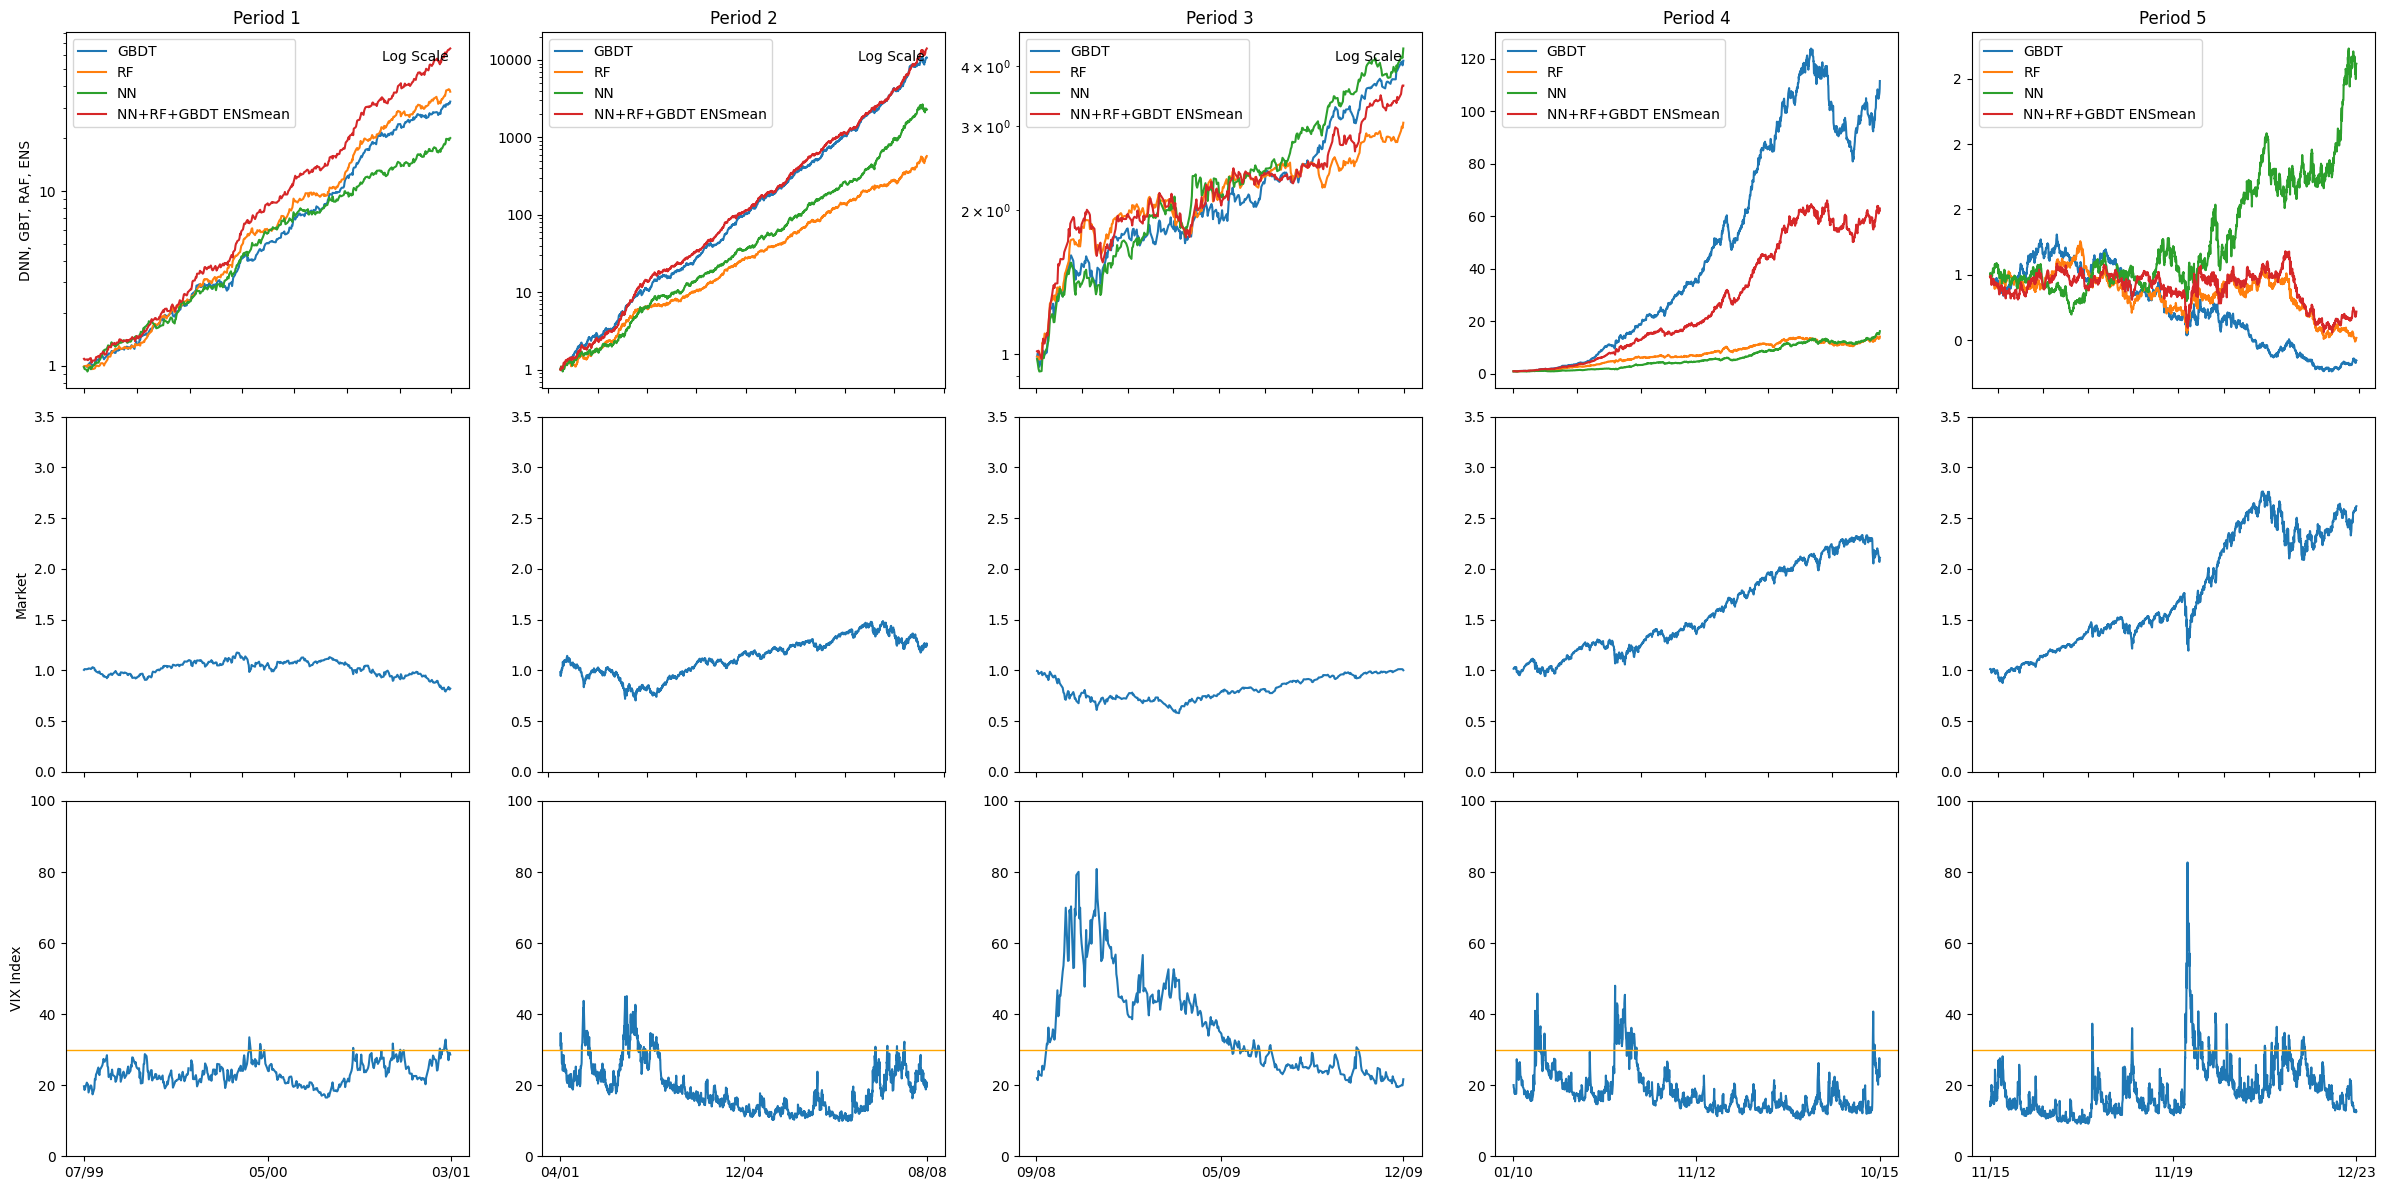

In [108]:
import matplotlib.pyplot as plt

df = gbdt_LSresult
df1 = rf_LSresult
df2 = nn_LSresult
df3 = nn_rf_gbdt_ENSmean_LSresult

# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'])

# 定义各个时期
periods = {
    'Period 1': ('1999-07-01', '2001-03-31'),
    'Period 2': ('2001-04-01', '2008-08-31'),
    'Period 3': ('2008-09-01', '2009-12-31'),
    'Period 4': ('2010-01-01', '2015-10-01'),
    'Period 5': ('2015-11-01', '2023-12-11')
}

# 计算累积回报率的函数
def calculate_cumulative_return(df, return_column):
    df = df.dropna(subset=[return_column])
    return np.exp(np.array(df[return_column]).cumsum())

# 创建子图
fig, axes = plt.subplots(3, 5, figsize=(24, 12), sharex=False)

for i, (period_name, (start_date, end_date)) in enumerate(periods.items()):
    period_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    period_df1 = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)]
    period_df2 = df2[(df2['Date'] >= start_date) & (df2['Date'] <= end_date)]
    period_df3 = df3[(df3['Date'] >= start_date) & (df3['Date'] <= end_date)]
    
    # 第一行的模型数据
    if not period_df.empty:
        axes[0, i].plot(period_df['Date'].values, calculate_cumulative_return(period_df, 'long_short_return_tran'), label="GBDT")
        axes[0, i].plot(period_df1['Date'].values, calculate_cumulative_return(period_df1, 'long_short_return_tran'),label="RF")
        axes[0, i].plot(period_df2['Date'].values, calculate_cumulative_return(period_df2, 'long_short_return_tran'),label="NN")
        axes[0, i].plot(period_df3['Date'].values, calculate_cumulative_return(period_df3, 'long_short_return_tran'), label="NN+RF+GBDT ENSmean")
        
        if i < 3:
            axes[0, i].set_yscale('log')
            axes[0, i].text(0.95, 0.95, 'Log Scale', transform=axes[0, i].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right')
        axes[0, i].set_title(period_name)
        axes[0, i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
        axes[0, i].legend()
    
    # 第二行的市场数据
    if not period_df.empty:
        market_return = calculate_cumulative_return(period_df, 'Mkt-RF')
        axes[1, i].plot(period_df['Date'].values, market_return)
        axes[1, i].set_ylim(0, 3.5)
    
    # 第三行的VIX数据
    if not period_df.empty:
        axes[2, i].plot(period_df['Date'].values, period_df['VIX'].values)
        axes[2, i].axhline(30, color='orange', linewidth=1)
        axes[2, i].set_ylim(0, 100)

# 设置标签
axes[0, 0].set_ylabel('DNN, GBT, RAF, ENS')
axes[1, 0].set_ylabel('Market')
axes[2, 0].set_ylabel('VIX Index')

# 设置日期格式和标记位置
for i, (period_name, (start_date, end_date)) in enumerate(periods.items()):
    period_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    if not period_df.empty:
        mid_date = period_df['Date'].iloc[len(period_df) // 2]
        axes[2, i].set_xticks([pd.to_datetime(start_date), mid_date, pd.to_datetime(end_date)])
        axes[2, i].set_xticklabels([pd.to_datetime(start_date).strftime('%m/%y'), 
                                    mid_date.strftime('%m/%y'), 
                                    pd.to_datetime(end_date).strftime('%m/%y')])

# 移除第一行和第二行的x轴标签
for ax in axes[0, :]:
    ax.set_xticklabels([])
for ax in axes[1, :]:
    ax.set_xticklabels([])

plt.tight_layout()
plt.savefig('fig2.png', dpi=300)
plt.show()

#### 分时期年化收益-风险特征表

Table 5 Annualized risk-return characteristics per sub-period for DNN, GBT, RAF, ENS1.

In [94]:
nn_rf_gbdt_ENSmean_LSresult

,Date,long_return,short_return,long_short_return,long_return_tran,short_return_tran,long_short_return_tran
0,1999-06-25,0.007034,0.010276,-0.003243,0.006034,0.011276,-0.005243
1,1999-06-28,0.022572,0.018410,0.004163,0.021572,0.019410,0.002163
2,1999-06-29,0.008992,-0.003246,0.012239,0.007992,-0.002246,0.010239
3,1999-06-30,0.047738,-0.047232,0.094970,0.046738,-0.046232,0.092970
4,1999-07-01,0.001100,0.010349,-0.009249,0.000100,0.011349,-0.011249
...,...,...,...,...,...,...,...
6245,2024-04-22,0.025154,0.006602,0.018552,0.024154,0.007602,0.016552
6246,2024-04-23,0.019626,-0.000686,0.020311,0.018626,0.000314,0.018311
6247,2024-04-24,-0.002523,-0.010279,0.007756,-0.003523,-0.009279,0.005756
6248,2024-04-25,0.005909,-0.005813,0.011722,0.004909,-0.004813,0.009722


In [95]:
nn_rf_gbdt_ENSmean_LSresult = pd.merge(nn_rf_gbdt_ENSmean_LSresult, ff3, on="Date", how="left")
nn_rf_gbdt_ENSmean_LSresult = pd.merge(nn_rf_gbdt_ENSmean_LSresult, ff5, on="Date", how="left")
nn_rf_gbdt_ENSmean_LSresult = pd.merge(nn_rf_gbdt_ENSmean_LSresult, mom, on="Date", how="left")
nn_rf_gbdt_ENSmean_LSresult = pd.merge(nn_rf_gbdt_ENSmean_LSresult, rev, on="Date", how="left")
nn_rf_gbdt_ENSmean_LSresult['long_short_return_tran'] = nn_rf_gbdt_ENSmean_LSresult['long_short_return_tran'].shift(1)
nn_rf_gbdt_ENSmean_LSresult = pd.merge(nn_rf_gbdt_ENSmean_LSresult, vix[["Date","VIX","VIX_dummy"]], on="Date", how="left")
nn_rf_gbdt_ENSmean_LSresult["VIX_dummy"].fillna(0, inplace=True)
nn_rf_gbdt_ENSmean_LSresult = nn_rf_gbdt_ENSmean_LSresult.dropna()

In [137]:
df = nn_rf_gbdt_ENSmean_LSresult
gbdt_LSresult

In [138]:
import empyrical as ep

# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'])

# 定义各个时期
# 定义各个时期
periods = {
    'Period 1': ('1999-07-01', '2001-03-31'),
    'Period 2': ('2001-04-01', '2008-08-31'),
    'Period 3': ('2008-09-01', '2009-12-31'),
    'Period 4': ('2010-01-01', '2015-10-01'),
    'Period 5': ('2015-11-01', '2023-12-11')
}

# 初始化结果列表
results_list = []

metrics = [
    'Mean return', 'Mean excess return', 'Standard deviation',
    'Sharpe ratio', 'Maximum drawdown', 'Calmar ratio'
]

# 计算每个时期的指标
for period_name, (start_date, end_date) in periods.items():
    base = gbdt_LSresult[(gbdt_LSresult['Date'] >= start_date) & (gbdt_LSresult['Date'] <= end_date)]
    period_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    if not period_df.empty:
        results_list.append([period_name, 'Metric', 'Before transaction costs', 'After transaction costs'])
        
        # Before transaction costs
        long_short_return = period_df['long_short_return'].dropna()
        before_metrics = [
            ep.annual_return(long_short_return),
            ep.alpha(long_short_return, base['Mkt-RF'].dropna()),
            ep.annual_volatility(long_short_return),
            ep.sharpe_ratio(long_short_return),
            ep.max_drawdown(long_short_return),
            ep.calmar_ratio(long_short_return)
        ]
        
        # After transaction costs
        long_short_return_tran = period_df['long_short_return_tran'].dropna()
        after_metrics = [
            ep.annual_return(long_short_return_tran),
            ep.alpha(long_short_return_tran, base['Mkt-RF'].dropna()),
            ep.annual_volatility(long_short_return_tran),
            ep.sharpe_ratio(long_short_return_tran),
            ep.max_drawdown(long_short_return_tran),
            ep.calmar_ratio(long_short_return_tran)
        ]
        
        for metric, before_value, after_value in zip(metrics, before_metrics, after_metrics):
            results_list.append(['', metric, before_value, after_value])
        
        results_list.append(['', '', '', ''])  # 添加空行

# 将结果转换为DataFrame
results_df = pd.DataFrame(results_list, columns=['Period', 'Metric', 'Before transaction costs', 'After transaction costs'])

# 获取df数据框的名称
df_name = [name for name in globals() if globals()[name] is df][0]
    
results_df.to_csv(f'table5_{df_name}.csv')
# 显示结果
results_df

,Period,Metric,Before transaction costs,After transaction costs
0,Period 1,Metric,Before transaction costs,After transaction costs
1,,Mean return,14.42977,9.094491
2,,Mean excess return,15.115927,9.984847
3,,Standard deviation,0.359625,0.365223
4,,Sharpe ratio,7.828042,6.540174
5,,Maximum drawdown,-0.081507,-0.087165
6,,Calmar ratio,177.037213,104.336439
7,,,,
8,Period 2,Metric,Before transaction costs,After transaction costs
9,,Mean return,4.787251,2.502479


单独计算市场那一列，table5里市场benchmark的

In [166]:
import empyrical as ep

# 将日期列转换为日期格式
df['Date'] = pd.to_datetime(df['Date'])

# 定义各个时期
# 定义各个时期
periods = {
    'Period 1': ('1999-07-01', '2001-03-31'),
    'Period 2': ('2001-04-01', '2008-08-31'),
    'Period 3': ('2008-09-01', '2009-12-31'),
    'Period 4': ('2010-01-01', '2015-10-01'),
    'Period 5': ('2015-11-01', '2023-12-11')
}

# 初始化结果列表
results_list = []

metrics = [
    'Mean return', 'Mean excess return', 'Standard deviation',
    'Sharpe ratio', 'Maximum drawdown', 'Calmar ratio'
]

# 计算每个时期的指标
for period_name, (start_date, end_date) in periods.items():
    base = gbdt_LSresult[(gbdt_LSresult['Date'] >= start_date) & (gbdt_LSresult['Date'] <= end_date)]
    period_df = gbdt_LSresult[(gbdt_LSresult['Date'] >= start_date) & (gbdt_LSresult['Date'] <= end_date)]
    
    if not period_df.empty:
        results_list.append([period_name, 'Metric', 'Before transaction costs', 'After transaction costs'])
        
        # Before transaction costs
        long_short_return = period_df['Mkt'].dropna()
        before_metrics = [
            ep.annual_return(long_short_return),
            ep.alpha(long_short_return, base['Mkt-RF'].dropna()),
            ep.annual_volatility(long_short_return),
            ep.sharpe_ratio(long_short_return),
            ep.max_drawdown(long_short_return),
            ep.calmar_ratio(long_short_return)
        ]
        
        # After transaction costs
        long_short_return_tran = period_df['Mkt'].dropna()
        after_metrics = [
            ep.annual_return(long_short_return_tran),
            ep.alpha(long_short_return_tran, base['Mkt-RF'].dropna()),
            ep.annual_volatility(long_short_return_tran),
            ep.sharpe_ratio(long_short_return_tran),
            ep.max_drawdown(long_short_return_tran),
            ep.calmar_ratio(long_short_return_tran)
        ]
        
        for metric, before_value, after_value in zip(metrics, before_metrics, after_metrics):
            results_list.append(['', metric, before_value, after_value])
        
        results_list.append(['', '', '', ''])  # 添加空行

# 将结果转换为DataFrame
results_df = pd.DataFrame(results_list, columns=['Period', 'Metric', 'Before transaction costs', 'After transaction costs'])

# 获取df数据框的名称
df_name = [name for name in globals() if globals()[name] is df][0]
    
results_df.to_csv(f'table5_Mkt.csv')
# 显示结果
results_df

,Period,Metric,Before transaction costs,After transaction costs
0,Period 1,Metric,Before transaction costs,After transaction costs
1,,Mean return,-0.080845,-0.080845
2,,Mean excess return,0.054973,0.054973
3,,Standard deviation,0.227802,0.227802
4,,Sharpe ratio,-0.256309,-0.256309
5,,Maximum drawdown,-0.308033,-0.308033
6,,Calmar ratio,-0.262454,-0.262454
7,,,,
8,Period 2,Metric,Before transaction costs,After transaction costs
9,,Mean return,0.043503,0.043503


In [162]:
results = gbdt_LSresult
base = gbdt_LSresult

顺手做了下table3里市场benchmark的，模型的结果不在此处

In [164]:
# 将结果汇总到一个字典中

# Mean return
annual_mean_return = empyrical.annual_return(results['Mkt'])

# Mean excess return
annual_excess_return =  empyrical.alpha(results['Mkt'],factor_returns=base['Mkt-RF'])

# Standard deviation
annual_standard_deviation = empyrical.annual_volatility(results['Mkt'])

# Downside deviation
annual_downside_deviation = empyrical.downside_risk(results['Mkt'])

# Sharpe ratio
annual_sharpe_ratio = empyrical.sharpe_ratio(results['Mkt'])

# Sortino ratio
annual_sortino_ratio = empyrical.sortino_ratio(results['Mkt'])

metrics = {
    'Mean Return':annual_mean_return,
    'Mean excess return':annual_excess_return,
    'Standard deviation': annual_standard_deviation,
    'Downside deviation': annual_downside_deviation,
    'Sharpe ratio': annual_sharpe_ratio,
    'Sortino ratio': annual_sortino_ratio
}

# 将结果转换为 DataFrame 并转置以便于查看
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Before transaction costs'])

# Mean return
annual_mean_return = empyrical.annual_return(results['Mkt'])
# Mean excess return
annual_excess_return =  empyrical.alpha(results['Mkt'],factor_returns=base['Mkt-RF'])
# Standard deviation
annual_standard_deviation = empyrical.annual_volatility(results['Mkt'])
# Downside deviation
annual_downside_deviation = empyrical.downside_risk(results['Mkt'])
# Sharpe ratio
annual_sharpe_ratio = empyrical.sharpe_ratio(results['Mkt'])
# Sortino ratio
annual_sortino_ratio = empyrical.sortino_ratio(results['Mkt'])

metrics = {
    'Mean Return':annual_mean_return,
    'Mean excess return':annual_excess_return,
    'Standard deviation': annual_standard_deviation,
    'Downside deviation': annual_downside_deviation,
    'Sharpe ratio': annual_sharpe_ratio,
    'Sortino ratio': annual_sortino_ratio
}

# 将结果转换为 DataFrame 并转置以便于查看
metrics_df_tran = pd.DataFrame.from_dict(metrics, orient='index', columns=['After transaction costs'])

# 将结果与之前的结果合并
combined_metrics_df = pd.concat([metrics_df, metrics_df_tran], axis=1)

df_name = [name for name in globals() if globals()[name] is results][0]
    
combined_metrics_df.to_csv(f'table3_Mkt.csv')

combined_metrics_df

,Before transaction costs,After transaction costs
Mean Return,0.080660,0.080660
Mean excess return,0.017411,0.017411
Standard deviation,0.197725,0.197725
Downside deviation,0.140492,0.140492
Sharpe ratio,0.491454,0.491454
Sortino ratio,0.691660,0.691660
